<a href="https://colab.research.google.com/github/Aryadhiva19/Aryadhiva/blob/main/Visualisasi_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [137]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [138]:
from google.colab import drive
drive.mount('/content/drive')

# Akses file
df = pd.read_csv('/content/drive/MyDrive/visualisasi/StudentsPerformance.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
df = df.drop(['gender','test preparation course','lunch'], axis=1)

In [140]:
# Cek informasi awal
df.info()

# Cek missing value
print(df.isnull().sum())

# Cek duplikat
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   race/ethnicity               1000 non-null   object
 1   parental level of education  1000 non-null   object
 2   math score                   1000 non-null   int64 
 3   reading score                1000 non-null   int64 
 4   writing score                1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB
race/ethnicity                 0
parental level of education    0
math score                     0
reading score                  0
writing score                  0
dtype: int64
2


In [141]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['math score', 'reading score', 'writing score']])

In [142]:
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['pass'] = df['average_score'].apply(lambda x: 1 if x >= 60 else 0)
df['lose'] = df['average_score'].apply(lambda x: 1 if x <= 60 else 0)

In [143]:
fitur = ['math score', 'reading score', 'writing score']
X = df[fitur]
y = df['pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [145]:
X_cluster = df[['math score', 'reading score', 'writing score']]
scaler = StandardScaler()
X_scaled_cluster = scaler.fit_transform(X_cluster)

In [146]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled_cluster)

In [147]:
cluster_mapping = {1: 0, 0: 1, 2: 2}
df['cluster'] = df['cluster'].map(cluster_mapping)

In [148]:
cluster_labels = {0: 'rendah', 1: 'sedang', 2: 'tinggi'}
df['cluster_label'] = df['cluster'].map(cluster_labels)

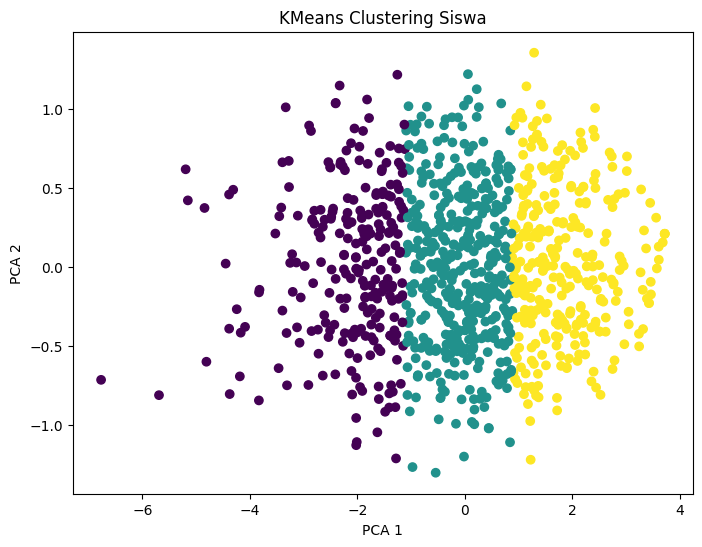

In [149]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_cluster)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['cluster'], cmap='viridis')
plt.title("KMeans Clustering Siswa")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [150]:
jumlah_lulus = df[df['pass'] == 1]['race/ethnicity'].value_counts().sort_index()
jumlah_gagal = df[df['lose'] == 1]['race/ethnicity'].value_counts().sort_index()

# Tampilkan ringkasan tabel
print("Jumlah siswa yang lulus per grup ras:")
print(jumlah_lulus)
print("Jumlah siswa yang gagal per grup ras:")
print(jumlah_gagal)

if 'pass' in df.columns:
    print("\nRasio kelulusan per klaster:")
    print(df.groupby('cluster_label')['pass'].mean() * 100)

Jumlah siswa yang lulus per grup ras:
race/ethnicity
group A     49
group B    131
group C    222
group D    197
group E    116
Name: count, dtype: int64
Jumlah siswa yang gagal per grup ras:
race/ethnicity
group A     40
group B     63
group C    101
group D     65
group E     24
Name: count, dtype: int64

Rasio kelulusan per klaster:
cluster_label
rendah      0.000000
sedang     91.873589
tinggi    100.000000
Name: pass, dtype: float64


In [151]:
df.head()

,race/ethnicity,parental level of education,math score,reading score,writing score,average_score,pass,lose,cluster,cluster_label
0,group B,bachelor's degree,72,72,74,72.666667,1,0,1,sedang
1,group C,some college,69,90,88,82.333333,1,0,2,tinggi
2,group B,master's degree,90,95,93,92.666667,1,0,2,tinggi
3,group A,associate's degree,47,57,44,49.333333,0,1,0,rendah
4,group C,some college,76,78,75,76.333333,1,0,2,tinggi


In [152]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1Wo8mQxNUN0-UXb_tHE6NOmMgqqVvpXNLThujY3nWuEg/edit#gid=0


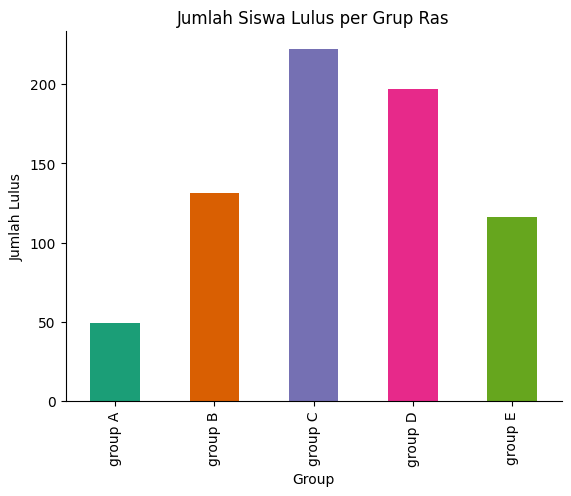

In [153]:
from matplotlib import pyplot as plt
import seaborn as sns
# Hitung jumlah siswa yang lulus (pass=1) per grup ras
lulus_per_race = df[df['pass'] == 1].groupby('race/ethnicity').size()

# Buat bar chart vertikal
lulus_per_race.plot(kind='bar', color=sns.color_palette('Dark2'))
plt.title('Jumlah Siswa Lulus per Grupzz')
plt.xlabel('Group')
plt.ylabel('Jumlah Lulus')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


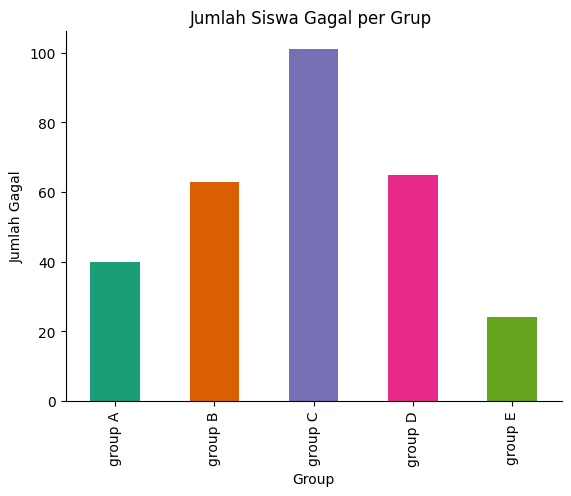

In [156]:
lulus_per_race = df[df['lose'] == 1].groupby('race/ethnicity').size()

# Buat bar chart vertikal
lulus_per_race.plot(kind='bar', color=sns.color_palette('Dark2'))
plt.title('Jumlah Siswa Gagal per Grup ')
plt.xlabel('Group')
plt.ylabel('Jumlah Gagal')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()